In [160]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sc_query import Corpus
from sc_query import QueryWordList
from sc_query import QueryAlternatives
from sc_query import QueryRegex
from sc_query import MarkdownFormater

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Loading suttas from suttacentral github image

Clone the `suttacentral-data` repository.

```bash
git clone https://github.com/suttacentral/suttacentral-data.git
```

Set the `rootdir` variable accordingly.


In [11]:
rootdir = "/home/jeff/dev/datayana/suttacentral-data/text/pi/su"

corpus = Corpus()
corpus.load_suttacentral(rootdir)
print("loaded {} files, total bytes {}".format(*corpus.count()))

loaded 5739 files, total bytes 28469442


## 2. Querying a list of simple keywords

Create a query made of just a list of keywords. Function `query_wordlist()` constructs the query by taking a list of keywords.

In [101]:
kwquery = QueryWordList([
            "anussavena", "paramparāya", "itikirāya", "piṭaka­sam­padā­nena",
            "takkahetu", "nayahetu", "ākāra­pari­vitak­kena", "diṭṭhi­nij­jhā­nak­khan­tiyā",
            "bhabbarūpatāya", "samaṇo no garū"        
    ])

results_kwquery = corpus.search(kwquery, sort="score")
print("Results found: {}".format(len(results_kwquery)))

Results found: 20


In [103]:
results_kwquery.get_all_labels('*')


[('diṭṭhinijjhānakkhantiyā', 36),
 ('paramparāya', 26),
 ('ākāraparivitakkena', 23),
 ('takkahetu', 20),
 ('nayahetu', 20),
 ('itikirāya', 19),
 ('anussavena', 17),
 ('piṭakasampadānena', 13),
 ('bhabbarūpatāya', 12),
 ('samaṇo no garū', 12)]

In [162]:
mk = MarkdownFormater()

mk.occurence_table(results_kwquery.get_all_forms(), "All forms")

print(mk.generate())

## All forms

| occ | expression |
| :-- | :-- |
| 36 | diṭṭhinijjhānakkhantiyā | 
| 26 | paramparāya | 
| 23 | ākāraparivitakkena | 
| 20 | takkahetu | 
| 20 | nayahetu | 
| 19 | itikirāya | 
| 17 | anussavena | 
| 13 | piṭakasampadānena | 
| 12 | bhabbarūpatāya | 
| 12 | samaṇo no garū | 




Creating a markdown file that shows those results

In [ ]:
with open("output/test_results-kwlist.md", "w") as ofile:
    ofile.write(result_markdown_formater(kwquery, results_kwquery))

## 3. Querying a list of alternatives

If each word can be found in multiple variants, create a list of alternatives.

Here's how to construct the query:

In [136]:
altquery = QueryAlternatives()

altquery.add_alternative("anussavena", ["anussavena", "anussavā", "itihitihaṃ", "itihītihaṃ"])
altquery.add_alternative("paramparāya", ["paramparāya"])
altquery.add_alternative("itikirāya", ["itikirāya", "itikiriyāya"])
altquery.add_alternative("piṭakasampadānena", ["piṭakasampadānena", "piṭakasampadāya"])
altquery.add_alternative("takkahetu", ["takkahetu"])
altquery.add_alternative("nayahetu", ["nayahetu"])
altquery.add_alternative("ākāraparivitakkena", ["ākāraparivitakkena", "ākāraparivitakkā"])
altquery.add_alternative("diṭṭhinijjhānakkhantiyā", ["diṭṭhinijjhānakkhantiyā"])
altquery.add_alternative("bhabbarūpatāya", ["bhabbarūpatāya"])
altquery.add_alternative("samaṇo no garū", ["samaṇo no garū"])

results_altquery = corpus.search(altquery, sort="score")
print("Results found: {}".format(len(results_altquery)))

Results found: 27


In [137]:
results_altquery.get_all_labels('*')

[('anussavena', 53),
 ('ākāraparivitakkena', 39),
 ('diṭṭhinijjhānakkhantiyā', 36),
 ('paramparāya', 26),
 ('piṭakasampadānena', 23),
 ('itikirāya', 20),
 ('takkahetu', 20),
 ('nayahetu', 20),
 ('bhabbarūpatāya', 12),
 ('samaṇo no garū', 12)]

In [138]:
results_altquery.get_all_forms('*')


[('diṭṭhinijjhānakkhantiyā', 36),
 ('paramparāya', 26),
 ('ākāraparivitakkena', 23),
 ('takkahetu', 20),
 ('nayahetu', 20),
 ('itikirāya', 19),
 ('anussavā', 18),
 ('anussavena', 17),
 ('ākāraparivitakkā', 16),
 ('itihītihaṃ', 15),
 ('piṭakasampadānena', 13),
 ('bhabbarūpatāya', 12),
 ('samaṇo no garū', 12),
 ('piṭakasampadāya', 10),
 ('itihitihaṃ', 3),
 ('itikiriyāya', 1)]

In [ ]:
with open("output/test_results-altlist.md", "w") as ofile:
    ofile.write(result_markdown_formater(altquery, results_altquery))

## 4. Showing matika co-occurences

/home/jeff/local/anaconda2/envs/datayana/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


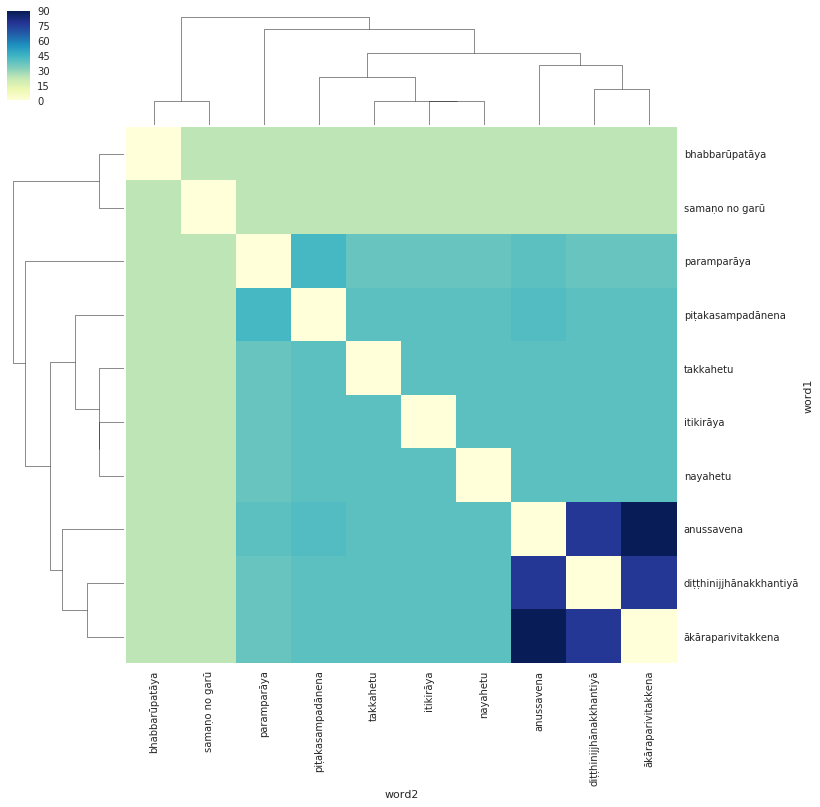

In [139]:
df_pivot = results_altquery.cooccurence_pivot()

rcmd_figsize = (df_pivot.shape[0]+2,df_pivot.shape[1]+2)

sns.set(color_codes=True)

g = sns.clustermap(df_pivot,
                   method="complete", metric="jaccard",
                   cmap="YlGnBu",
                   figsize=rcmd_figsize)

g.savefig("output/img/test_matika_cooccurences.png")

## 5. Test other examples

In [ ]:
from sc_query import collect_matika_cooccurences_counter
import pandas as pd

altquery = {
    "alternatives_list": [
        { "label": "dukkha", "forms": ["dukkh"] },
        { "label": "nirodha", "forms": ["nirodh"] },
        { "label": "samudaya", "forms": ["samuday"] },
        { "label": "magga", "forms": ["magga"] },
        { "label": "anicca", "forms": ["anicca"] },
        { "label": "anatta", "forms": ["anatta"] },
        { "label": "rupa", "forms": ["rūpa", "rūpā"] },
        { "label": "vedana", "forms": ["vedana", "vedanā"] },
        { "label": "sanna", "forms": ["saññā", "sañña"] },
        { "label": "sankhara", "forms": ["sankhārā", "saṅkhāra", "sankhar", "sankhār"] },
        { "label": "vijnana", "forms": ["viññāṇaṃ", "viññāṇ"] }
    ]
}

results_altquery = search_documentlist(altquery, docs, sort="score")
print("Results found: {}".format(len(results_altquery)))

In [ ]:
import math

#df_pivot = collect_matika_cooccurences_pivot(results_altquery,
#                                             transform=lambda v : 1 / (1+math.log(v)),
#                                             normalize="minmax")

df_pivot = collect_matika_cooccurences_pivot(results_altquery)

#df_pivot

In [ ]:
rcmd_figsize = (df_pivot.shape[0]+2,df_pivot.shape[1]+2)

sns.set(color_codes=True)

import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

linkage = hc.linkage(sp.distance.squareform(df_pivot), method='single')

g = sns.clustermap(df_pivot,
                   row_linkage=linkage,
                   col_linkage=linkage,
                   figsize=rcmd_figsize)

g.savefig("output/img/test_matika_fournobletruths.png")

## Example: locating the suttas

In [163]:
#location_regex = r"ekaṃ samayaṃ ([^\.\'\"\“\”\‘\’\?]+) (viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])"
#location_regex = r"ekaṃ samayaṃ (bhagavā|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+|āyasmā [^\ ]+|[^\.\'\"\“\”\‘\’\?]+ bhikkhu) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])"
#location_regex = r"ekaṃ samayaṃ (bhagavā|āyasmā [^\ ]+|[^\.\'\"\“\”\‘\’\?]+ bhikkh[uū]|[^\ ]+ āyasmā) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno)([^\.]+)(?:[\.])"
#location_regex = r"ekaṃ samayaṃ ((bhagavā)|(āyasmā [^\ ]+)|(āyasmā ca [^\ ]+\ ?)+|([^\.\'\"\“\”\‘\’\?]+ bhikkh[uū])) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno)([^\.]+)\."
location_query = QueryRegex(
    r"ekaṃ samayaṃ (bhagavā|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+|āyasmā [^\ ]+|[^\.\'\"\“\”\‘\’\?]+ bhikkhu) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])",
    group_map={0: '*', 1:'name', 2:'location', 4:'rest'}
)

full_results_location = corpus.search(location_query, sort="score")
print("Results found: {}".format(len(full_results_location)))


Results found: 782


In [167]:
mk = MarkdownFormater()
mk.catches_table(full_results_location.get_all_document_catches(group='location'), "Located suttas")

print(mk.generate())

## Located suttas

| occ | expression | refs |
| :-- | :-- | :-- |
| 277 | sāvatthiyaṃ | dn10, dn27, dn30, dn14, dn9, an8.41, an8.43, an8.20, an8.47, an8.45, an8.1, an8.49, an9.11, an9.4, an9.20, an9.1, an9.12, an3.127, an3.21, an3.1, an3.66, an3.70, an3.71, 10, an10.1, an10.91, an10.27, an10.50, an10.51, an10.18, an10.60, an10.71, an10.30, an10.93, an10.75, an10.69, an10.70, 10, an11.1, an4.21, an4.197, an4.67, an4.101, an4.45, an4.190, an4.48, an5.55, an5.171, an5.41, an5.49, an5.1, an5.51, an6.43, an6.1, an6.34, an6.17, an6.37, an6.49, an7.3, an7.1, an7.28, mn42, mn147, mn17, mn145, mn78, mn127, mn113, mn27, mn148, mn132, mn93, mn138, mn134, mn43, mn37, mn25, mn80, mn121, mn137, mn30, mn149, mn111, mn21, mn72, mn8, mn3, mn45, mn62, mn6, mn26, mn87, mn96, mn9, mn23, mn4, mn13, mn146, mn22, mn16, mn19, mn20, mn47, mn99, mn109, mn38, mn2, mn123, mn131, mn118, mn117, mn143, mn64, mn129, mn130, mn115, mn59, mn7, mn5, mn46, mn88, mn120, mn33, mn110, mn86, mn139, mn114, mn28, mn119, mn49, 

In [122]:
selection = full_results_location.subset("[adms]n[0-9]")
len(selection.get_all_docids())

675

In [ ]:
#location_regex = r"ekaṃ samayaṃ ([^\.\'\"\“\”\‘\’\?]+) (viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])"
location_regex_2 = r"^(sāvatthiyaṃ viharati|sāvatthinidānaṃ)."
location_query_2 = query_regex(location_regex_2, group_map={0: 'location'})

full_results_location_2 = search_documentlist(location_query_2, docs, sort="score")
print("Results found: {}".format(len(full_results_location_2)))

#[doc['doc_id'] for doc in full_results_location_2]

In [ ]:
print(set(dn_suttas_ids).difference(set(dn_suttas_located)))
print(set(mn_suttas_ids).difference(set(mn_suttas_located)))
#print(set(an_suttas_ids).difference(set(an_suttas_located)))

print(set(sn_suttas_ids).difference(set(sn_suttas_located)))


In [ ]:
ayasma_regex = r"((āyasmā (ca )?[^\ \.\'\"\“\”\‘\’\?\(\)…\—]+)|([^\ \.\,\'\"\“\”\‘\’\?\(\)…\—]+ bhikkh[uū]))"
ayasma_query = query_regex(ayasma_regex, group_map={1: 'name'})

name_results = search_documentlist(ayasma_query, docs, sort="score")
print("Results found: {}".format(len(name_results)))

names = []
for doc in name_results:
    names.extend([c.get('name',None) for c in doc['catch']])

from collections import Counter
Counter(names).most_common(10)

### Example: "yaṃ kiñci samuda­ya­dhammaṃ sabbaṃ taṃ nirodhadhamma"

In [124]:
formula_query = QueryWordList([
        "yaṃ kiñci samuda­ya­dhammaṃ sabbaṃ taṃ nirodhadhamma"
    ])

results = corpus.search(formula_query, sort="score")
print("Results found: {}".format(len(results)))

results.get_all_docids()

Results found: 33


{'an8.12',
 'an8.21',
 'an8.22',
 'cnd12',
 'cnd16',
 'cnd20',
 'cnd22',
 'cnd23',
 'cnd5',
 'cnd6',
 'cnd8',
 'cnd9',
 'dn14',
 'dn21',
 'dn3',
 'dn5',
 'mil2',
 'mn147',
 'mn56',
 'mn74',
 'mn91',
 'mnd10',
 'mnd11',
 'mnd13',
 'mnd14',
 'mnd15',
 'mnd16',
 'mnd4',
 'sn35.121',
 'sn35.245',
 'sn35.74',
 'sn56.11',
 'ud5.3'}

In [127]:
formula_query = QueryWordList([
        "yaṃ kho kiñci",
        "yampi hi kiñci",
        "yā kāci",
        "yaṃ kiñci",
        "ye keci",
        "samudayadhamma",
        "sabbaṃ taṃ",
        "nirodhadhamma"
    ])

results = corpus.search(formula_query, sort="score")
print("Results found: {}".format(len(results)))

print(results.get_all_docids())

Results found: 344
{'pv15', 'cnd22', 'ps3.1', 'sn22.126', 'mil6.1.5', 'tha-ap1', 'ja480', 'sn22.59', 'tha-ap430', 'an10.15', 'mn115', 'dn2', 'cp8', 'an6.53', 'mil7.3.8', 'ud5.3', 'mn8', 'dn9', 'sn48.69', 'an7.61', 'sn45.110', 'mil5.1.5', 'ja536', 'cnd19', 'mnd16', 'ne15', 'cnd20', 'sn9.10', 'sn48.67', 'pe8', 'snp2.1', 'mnd15', 'mil6.2.8', 'sn45.128', 'an5.100', 'snp5.9', 'mn147', 'dn23', 'snp2.12', 'vv33', 'snp1.8', 'mil6.3.1', 'an3.61', 'iti112', 'vv6', 'vv4', 'mil3.1.14', 'ja533', 'vv23', 'snp3.12', 'dn3', 'ud5.5', 'sn56.43', 'an8.8', 'an11.17', 'an4.196', 'ja546', 'ja534', 'mil6.3.9', 'mn22', 'ja430', 'ja530', 'sn35.33-42', 'pe2', 'ja535', 'mil2', 'sn46.31', 'sn1.39', 'dn14', 'cnd12', 'vv14', 'cnd9', 'mil5.1.1', 'mn119', 'an10.104', 'dn20', 'dn16', 'ne37', 'ud5.2', 'mn76', 'cnd14', 'sn22.71', 'mn54', 'cnd7', 'mil6.4.1', 'sn12.70', 'mn37', 'pe1', 'sn45.139', 'cnd16', 'an10.219', 'vv10', 'mil5.1.2', 'tha-ap544', 'sn36.21', 'sn35.135', 'bv2', 'snp3.6', 'cnd11', 'sn46.99-110', 'sn22.91'

In [131]:
#formula_reg = r"(ya|yā|ye)([^\.\'\"\“\”\‘\’\?]+)(kiñci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)sabbaṃ([^\:\.\'\"\“\”\‘\’\?]+)[\:\.\'\"\“\”\‘\’\?]"
#formula_reg = r"((ya|yā|ye)([^\.\'\"\“\”\‘\’\?\;]+)(kiñci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)sabb[aā]([^\:\.\'\"\“\”\‘\’\?]+))(?:[\:\.\'\"\“\”\‘\’\?])"
#formula_reg = r"((ya|yā|ye)([^\.\'\"\“\”\‘\’\?\;]+)(ki[ñnñ]ci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)(sabb[aā] |taṃ )([^\:\.\'\"\“\”\‘\’\?]+))(?:[\:\.\'\"\“\”\‘\’\?])"

yam_kinci_query = QueryRegex(
    r"((ya|yā|ye)([^\.\'\"\“\”\‘\’\?\;]+)(ki[ñnñ]ci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)(sabb[aā] |taṃ )([^\:\.\'\"\“\”\‘\’\?]+))(?:[\:\.\'\"\“\”\‘\’\?])",
    group_map={1: '*'}
)

results = corpus.search(yam_kinci_query)

selection = results.subset("[adms]n[0-9]")

print(selection.get_all_docids())

{'sn56.26', 'sn35.121', 'mn88', 'an10.219', 'sn56.6', 'mn100', 'sn45.104', 'sn56.24', 'an4.181', 'sn51.17', 'an10.15', 'sn22.59', 'dn2', 'an6.53', 'sn22.91', 'sn56.11', 'sn17.25', 'an8.22', 'mn56', 'sn14.38', 'mn52', 'sn18.21', 'dn9', 'dn21', 'mn109', 'sn45.110', 'mn151', 'mn121', 'mn140', 'sn45.134', 'sn22.72', 'mn62', 'sn16.11', 'sn20.1', 'sn22.79', 'dn5', 'mn74', 'sn22.48', 'sn23.5', 'sn9.10', 'sn45.141', 'mn38', 'mn28', 'sn45.116', 'dn18', 'sn3.4', 'mn89', 'dn1', 'sn55.39', 'sn22.92', 'sn45.128', 'an5.100', 'mn147', 'sn22.82', 'sn56.4', 'an8.21', 'sn22.107', 'mn35', 'mn13', 'mn66', 'sn23.6', 'sn24.96', 'sn18.22', 'mn102', 'sn12.30', 'sn36.27', 'dn34', 'sn45.122', 'an8.12', 'mn91', 'sn22.89', 'sn17.26', 'dn3', 'sn12.32', 'sn45.98', 'sn36.28', 'an3.106', 'dn10', 'an8.8', 'sn7.18', 'sn48.6', 'sn24.71', 'sn17.27', 'sn55.6', 'sn48.29', 'an4.196', 'an4.8', 'mn11', 'sn45.146', 'sn3.5', 'sn22.47', 'sn36.11', 'mn39', 'mn22', 'sn41.10', 'sn35.245', 'sn22.95', 'sn44.2', 'an3.133', 'sn46.7', '

In [ ]:
with open("output/test_yam-kinci-regex.md", "w") as ofile:
    ofile.write(result_markdown_formater(formula_query, sorted(results_formula, key=lambda d : d['doc_id'])))

In [ ]:
re.match("bn", "an56")

In [ ]:
a = [1]
a.extend(None)